<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/codeforces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

In [ ]:
link = 'https://codeforces.com/problemset'
html = requests.get(link).text

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html, "html.parser")
# print(soup)

In [ ]:
tasks = soup.find('table', class_='problems').findAll('tr')
print(len(tasks))

101


In [ ]:
import pandas as pd

In [ ]:
i = 0
line = []
for item in tasks[1:]:
  td = item.findAll('td')
  line.append([0] * 7)
  line[i][0] = td[0].a.text.strip('\r\n ')[:4]
  line[i][1] = td[0].a.text.strip('\r\n ')[4:]
  line[i][2] = td[1].div.a.text.strip('\r\n ')
  line[i][3] = list(map(lambda x: x.text, td[1].findAll('div')[1].findAll('a')))
  if td[3].span is None:
    line[i][4] = None
  else:
    line[i][4] = int(td[3].span.text)
  line[i][5] = int(td[4].a.text.strip('\xa0x'))
  line[i][6] = td[0].a['href']
  print(line[i])
  i += 1

['1620', 'G', 'Subsequences Galore', ['bitmasks', 'combinatorics', 'dp', 'math'], None, 188, '/problemset/problem/1620/G']
['1620', 'F', 'Bipartite Array', ['dp'], None, 56, '/problemset/problem/1620/F']
['1620', 'E', 'Replace the Numbers', ['data structures', 'dsu', 'trees'], None, 2764, '/problemset/problem/1620/E']
['1620', 'D', 'Exact Change', ['brute force', 'constructive algorithms', 'greedy', 'implementation'], None, 1317, '/problemset/problem/1620/D']
['1620', 'C', 'BA-String', ['brute force', 'dp', 'greedy', 'implementation', 'math'], None, 2479, '/problemset/problem/1620/C']
['1620', 'B', 'Triangles on a Rectangle', ['geometry', 'greedy', 'math'], None, 9573, '/problemset/problem/1620/B']
['1620', 'A', 'Equal or Not Equal', ['constructive algorithms', 'implementation'], None, 11642, '/problemset/problem/1620/A']
['1618', 'G', 'Trader Problem', ['binary search', 'data structures', 'dsu', 'greedy', 'sortings'], 2200, 530, '/problemset/problem/1618/G']
['1618', 'F', 'Reverse', [

In [ ]:
df = pd.DataFrame(line, columns=('Contest', 'Number', 'Name', 'Tags', 'Difficulty', 'Solutions', 'Link'))
df.sample(5)

,Contest,Number,Name,Tags,Difficulty,Solutions,Link
93,1603,F,"October 18, 2017","[combinatorics, dp, implementation, math]",2700.0,83,/problemset/problem/1603/F
81,1606,D,Red-Blue Matrix,"[brute force, constructive algorithms, impleme...",2400.0,1016,/problemset/problem/1606/D
64,1608,G,Alphabetic Tree,"[binary search, data structures, dfs and simil...",3500.0,36,/problemset/problem/1608/G
39,1611,G,Robot and Candies,"[data structures, graph matchings, greedy]",2500.0,320,/problemset/problem/1611/G
40,1611,F,ATM and Students,"[binary search, data structures, two pointers]",1800.0,3370,/problemset/problem/1611/F


In [ ]:
import statistics

In [ ]:
print('Медианная сложность:', statistics.median(df['Difficulty']))
print('Среднее кол-во решений:', statistics.mean(df['Solutions']))

Медианная сложность: 1650.0
Среднее кол-во решений: 6078.83


In [ ]:
import matplotlib.pyplot as plt

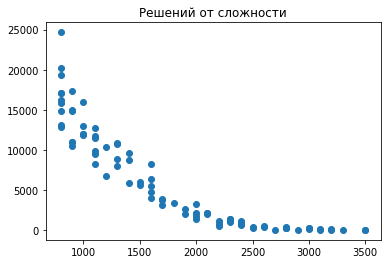

In [ ]:
plt.title('Решений от сложности')
plt.scatter(df['Difficulty'], df['Solutions'])
plt.show()

In [ ]:
hist = df['Contest'].value_counts()

1610    9
1607    8
1609    8
1611    8
1608    7
1618    7
1612    7
1620    7
1617    6
1613    6
1605    6
1606    6
1614    6
1603    6
1604    2
1602    1
Name: Contest, dtype: int64


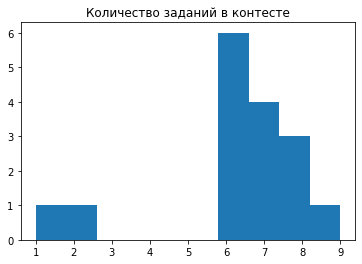

In [ ]:
plt.title('Количество заданий в контесте')
plt.hist(hist)
plt.show()

In [ ]:
df.to_csv("codeforces.csv", index=False)